In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('winequalityN.csv')

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Exploratory Data Analysis

In [5]:
df.shape

(6497, 13)

<AxesSubplot:xlabel='type', ylabel='count'>

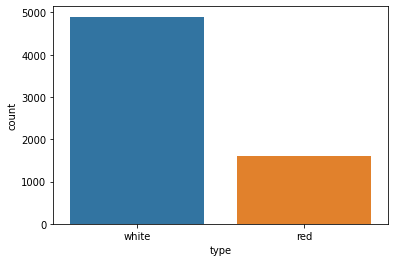

In [6]:
# Let's check data distribution of wine type.
sns.countplot(x='type',data=df)

In [7]:
# Clearly, we have data imbalance here. 
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [8]:
df_train = df[df.type=='white'].sample(1599,random_state=0).append(df[df.type=='red'].sample(1599,random_state=0))

In [9]:
df_train = df_train.sample(frac=1)

In [10]:
df_train.reset_index(inplace=True,drop=True)

In [11]:
df_train.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,8.0,0.18,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6
1,red,6.7,0.46,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
2,red,9.8,0.34,0.39,1.4,0.066,3.0,7.0,0.99470,3.19,0.55,11.4,7
3,white,6.5,0.28,0.29,2.7,0.038,26.0,107.0,0.99120,3.32,0.41,11.6,7
4,red,8.1,0.78,0.23,2.6,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,5


<AxesSubplot:xlabel='type', ylabel='count'>

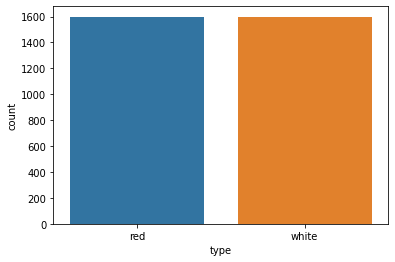

In [12]:
sns.countplot(x='type',data=df_train)

In [25]:
# numerical columns
numeric_data = [feature for feature in df_train.columns if df_train[feature].dtypes !='O' and feature not in 'quality']

<AxesSubplot:xlabel='type', ylabel='count'>

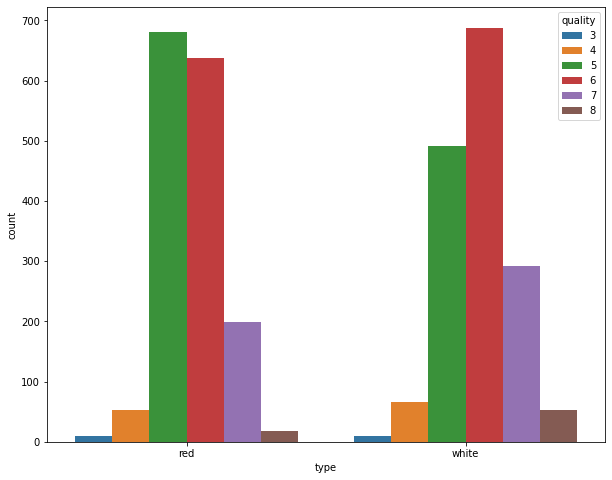

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x='type',hue='quality',data=df_train)

In [27]:
# 5, 6 contribute to majority of distribution 
# Quality ranges from 0-10.
# We can classify them into 3 major classes i.e. 0-4 --> Bad, 5-6 --> Average, 7-10 --> Good

In [33]:
# Let's see the distribution of data with Quality ( on red and white wine )
# Also, we can develop some sense of 'Suspected outliers'

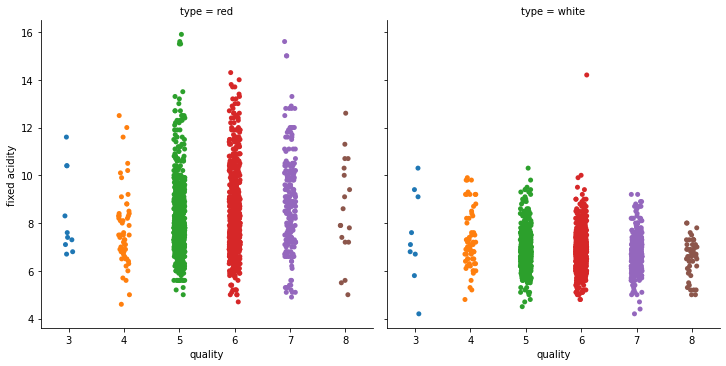

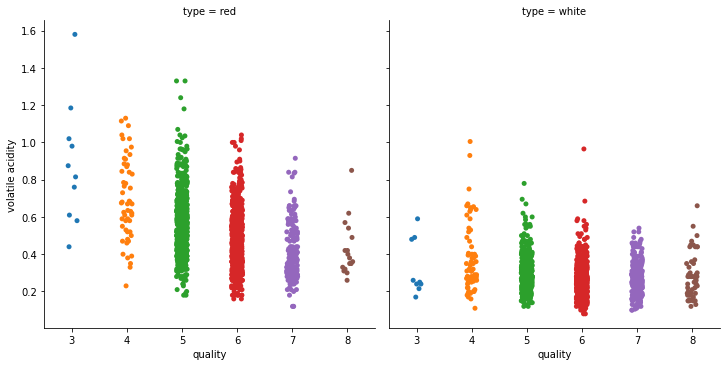

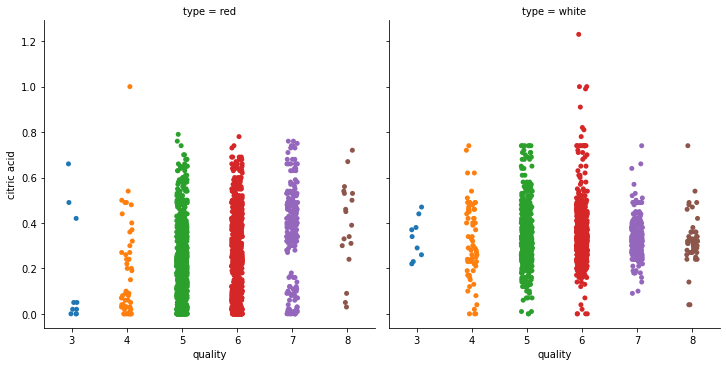

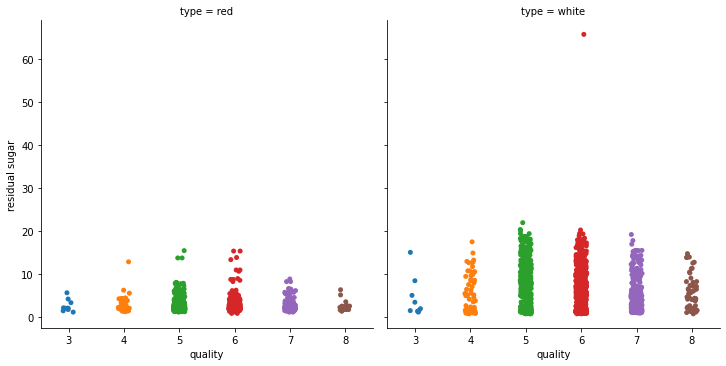

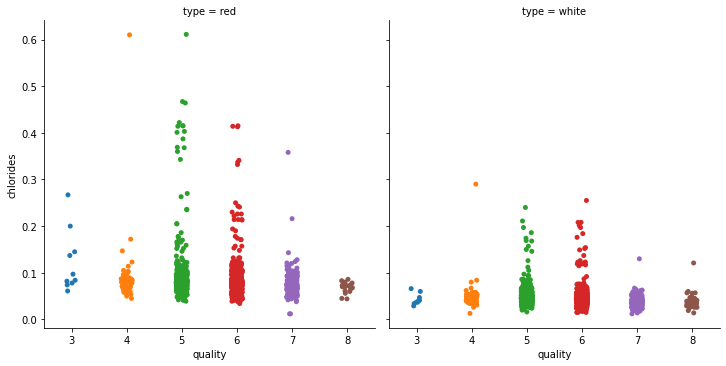

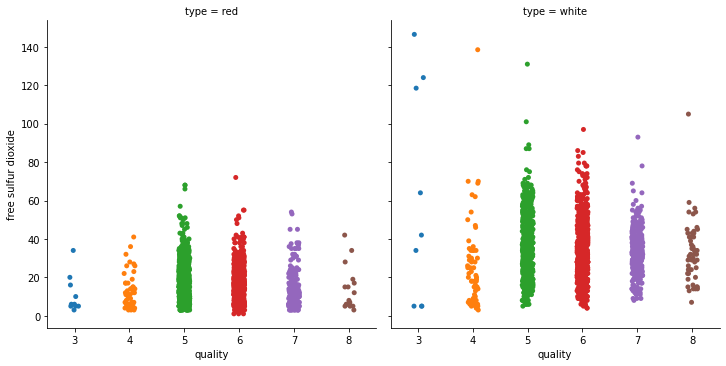

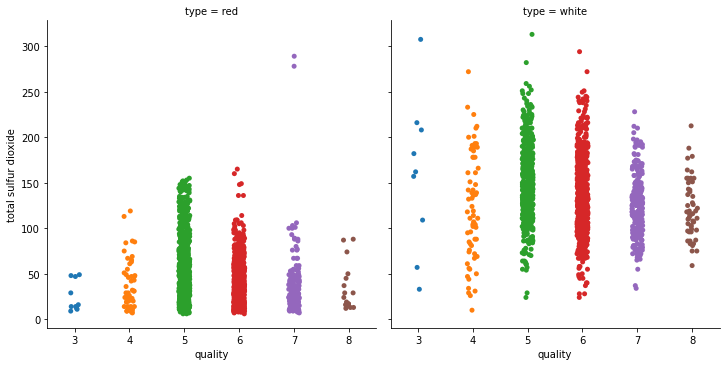

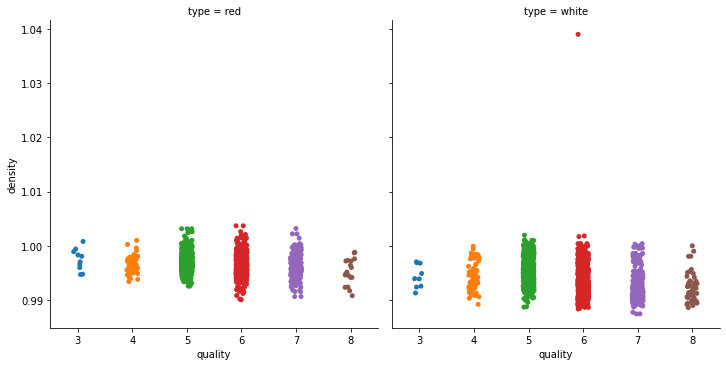

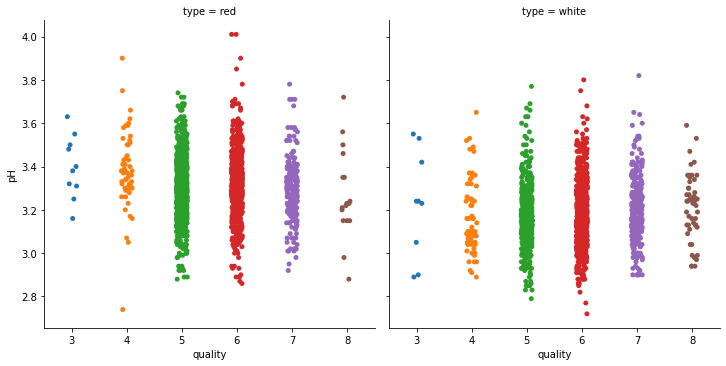

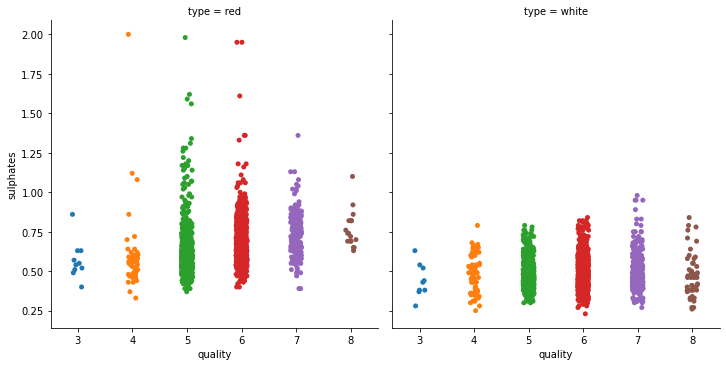

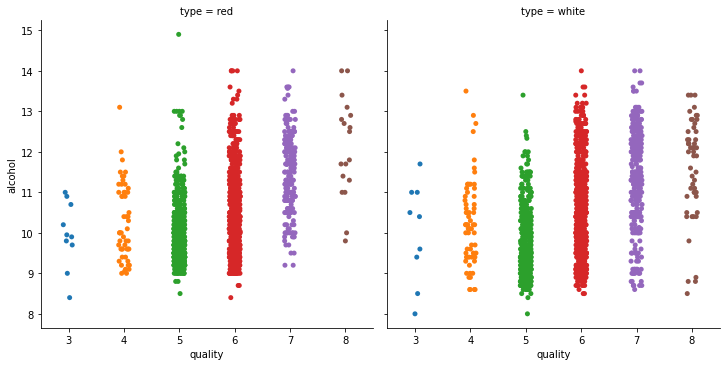

In [31]:
for feature in numeric_data:
    sns.catplot(x='quality',y=feature,col='type',data=df_train)
    plt.show()

#### INFERENCES b/w Red-White:
1. Fixed Acidity : Red (4 - 16) > White (4 - 10)
2. Volatility acidity: Red (0.2 - 1.4) > White (0.1 - 1.0)
3. Residual sugar : Red < White 
4. Free sulphur dioxide : Red < White
5. Total sulphur dioxide : Red < White
6. Sulphates : Red > White

#### Visually confirmed outliers:
1. White wine (Q-6) high fixed acidity ( could be red )
2. White wine (Q-6) residual sugar ( neither red nor white has similar value )

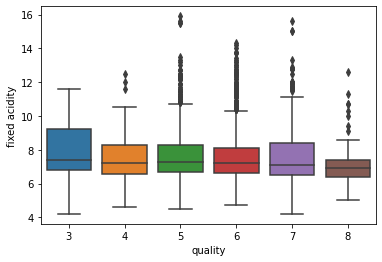

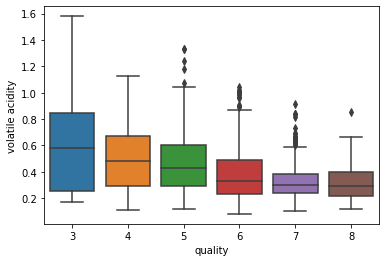

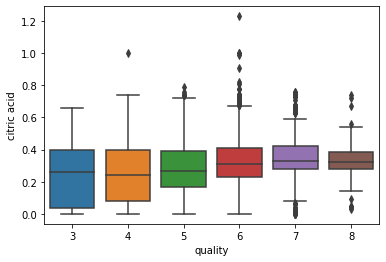

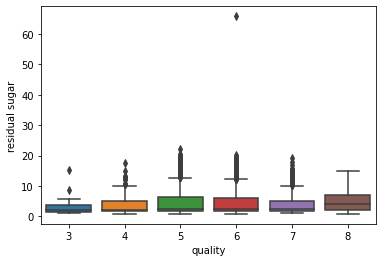

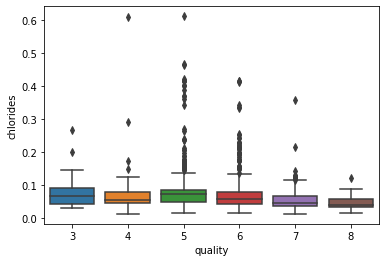

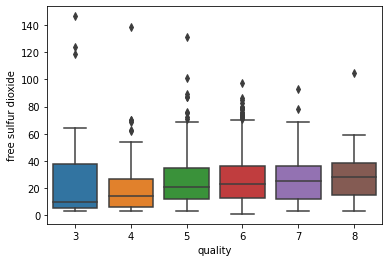

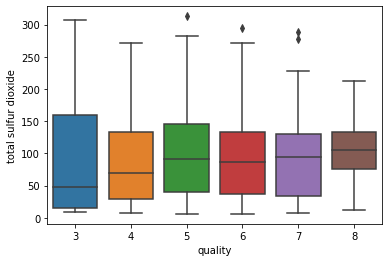

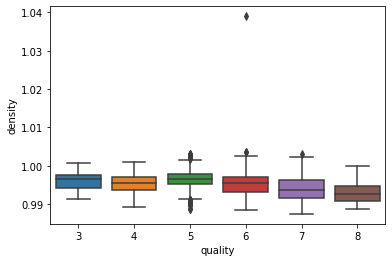

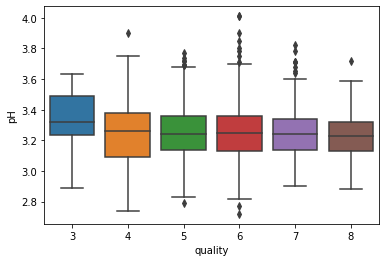

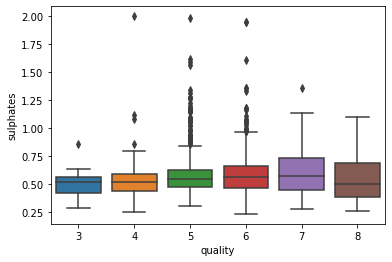

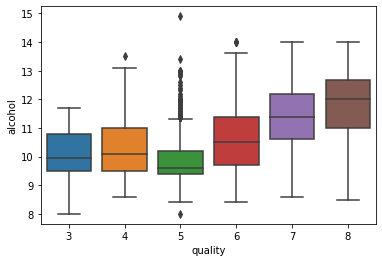

In [41]:
for feature in numeric_data:
    sns.boxplot(x='quality',y=feature,data=df_train)
    plt.show()

#### INFERENCES wrt quality:
Comparision with median is a better measure as it isn't affected by the outliers.
1. Fixed Acidity :     similar for all qualities
2. Volatile acidity :  lower the volatile acidity better the wine quality
3. Citric acid :       slighlty on higher side for good quality wine
4. Residual sugar
5. Chlorides :         lower the chlorides better the wine quality
6. Free/Total sulphur dioxide : Higher the sulphur dioxide content better the quality
7. pH/Density : similar values for all
8. Alcohol : higher alcohol content results in better quality

In [52]:
df_train.groupby('quality').median()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.4,0.58,0.26,2.1,0.0660,10.0,48.0,0.99660,3.32,0.520,9.95
4,7.2,0.48,0.24,2.2,0.0540,14.0,69.0,0.99560,3.26,0.520,10.10
5,7.3,0.43,0.27,2.4,0.0710,21.0,92.0,0.99660,3.24,0.540,9.60
6,7.2,0.33,0.31,2.4,0.0570,23.0,87.0,0.99550,3.25,0.560,10.50
7,7.1,0.30,0.33,2.5,0.0460,25.0,95.0,0.99380,3.24,0.570,11.40
8,6.9,0.29,0.32,4.0,0.0395,28.5,106.0,0.99257,3.23,0.495,12.00


<AxesSubplot:>

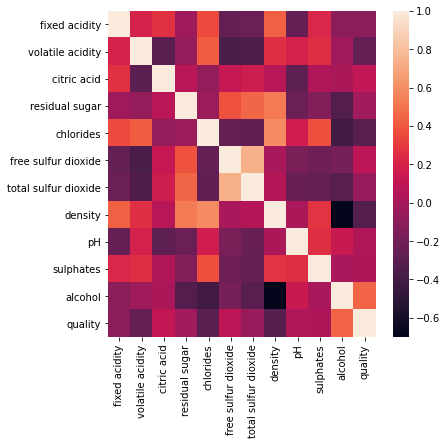

In [48]:
# Correlation b/w features:
plt.figure(figsize=(6,6))
corrmat = df.corr(method='spearman')
sns.heatmap(corrmat)

In [56]:
# There isn't any strong correlation between features and target variable. 
# Alcohol shows moderate correlation.
# Density, Chlorides, volatile acidity show negative correlation which we also interpreted from inferences made using boxplot